In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [5]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [6]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [7]:
data.describe().style.format("{:.2f}")

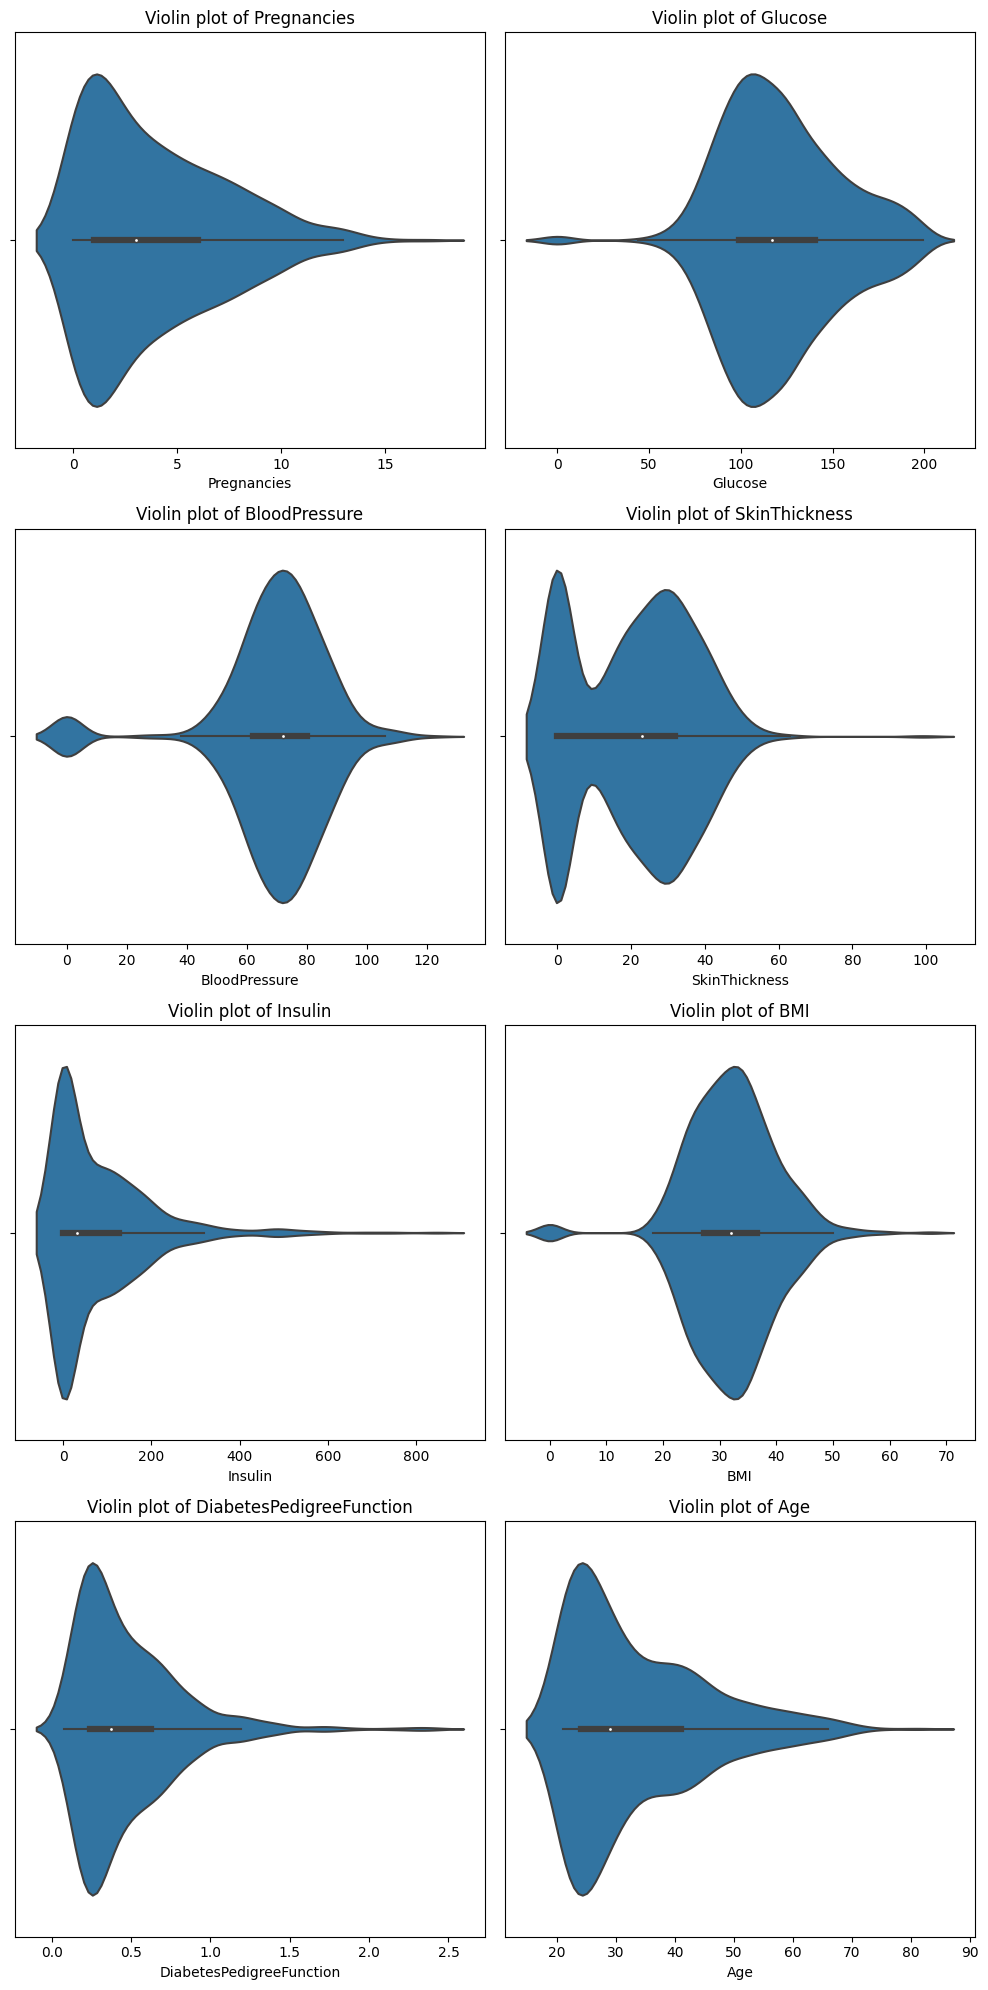

In [8]:
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=data[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

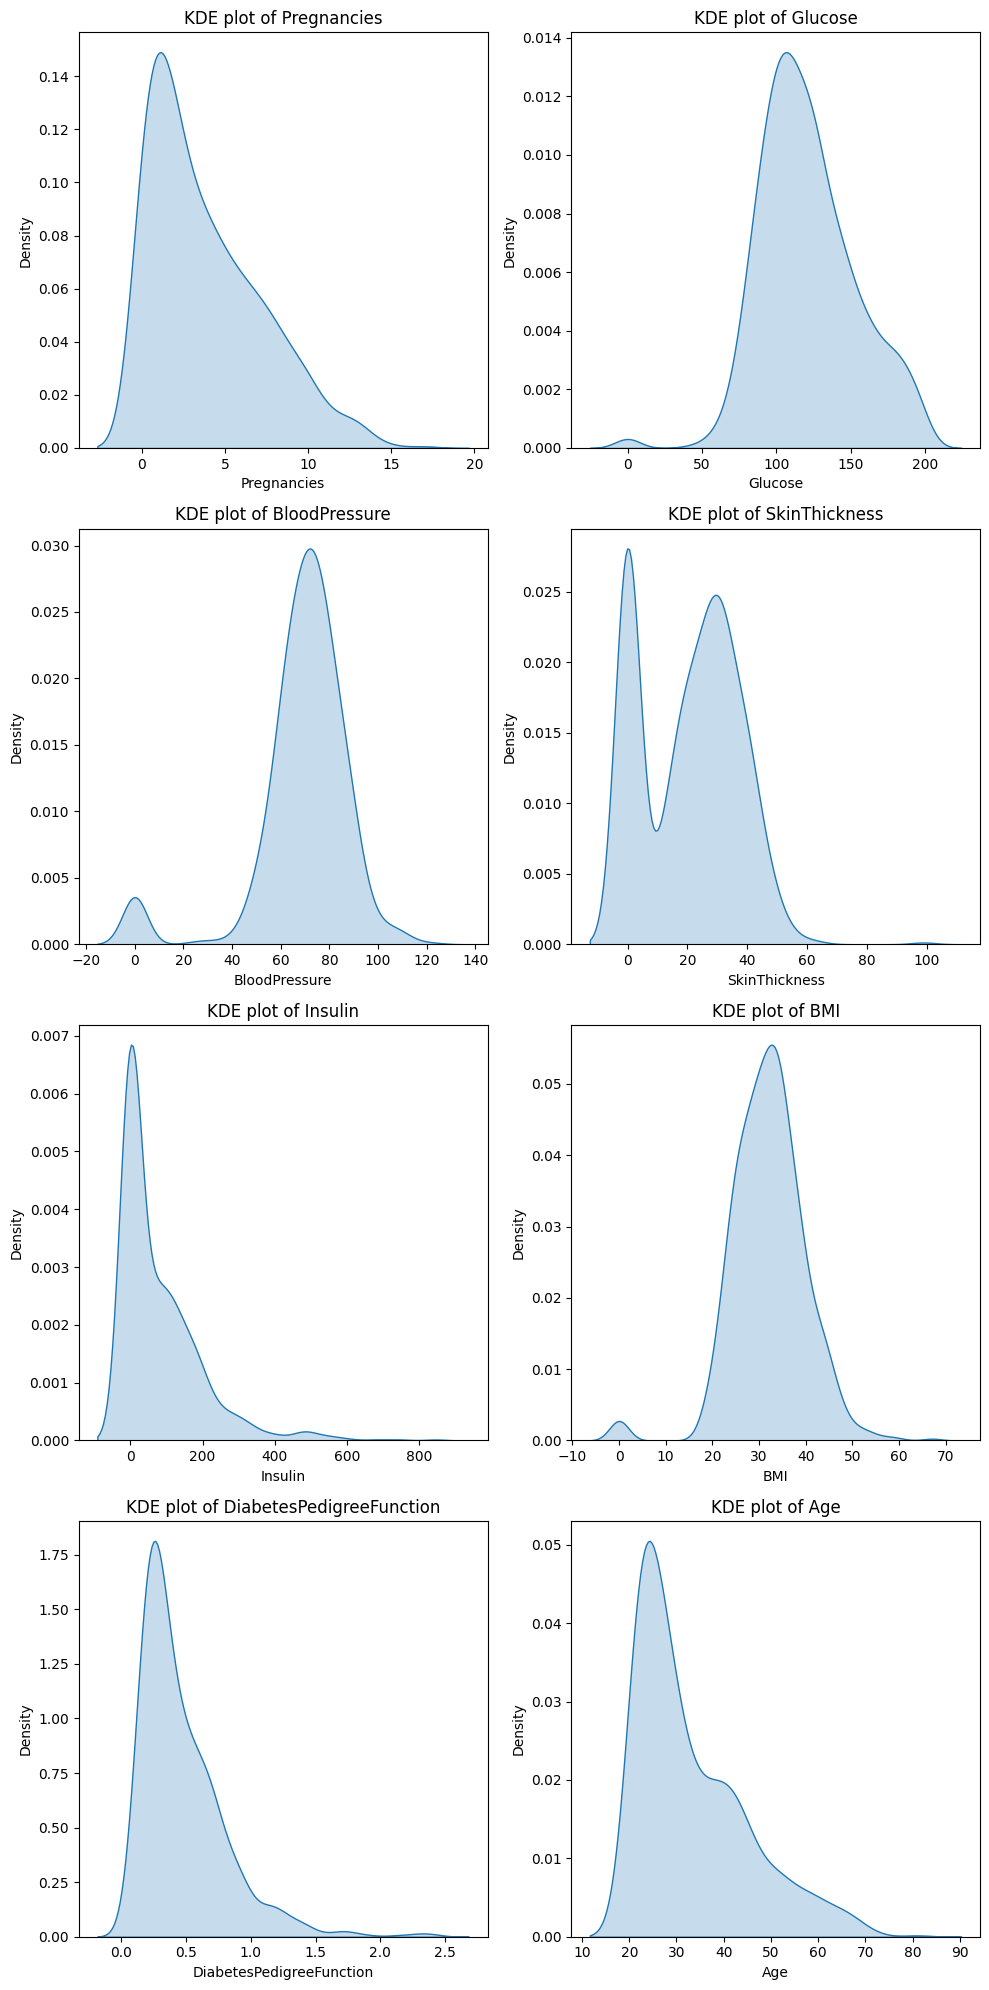

In [9]:
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=data[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

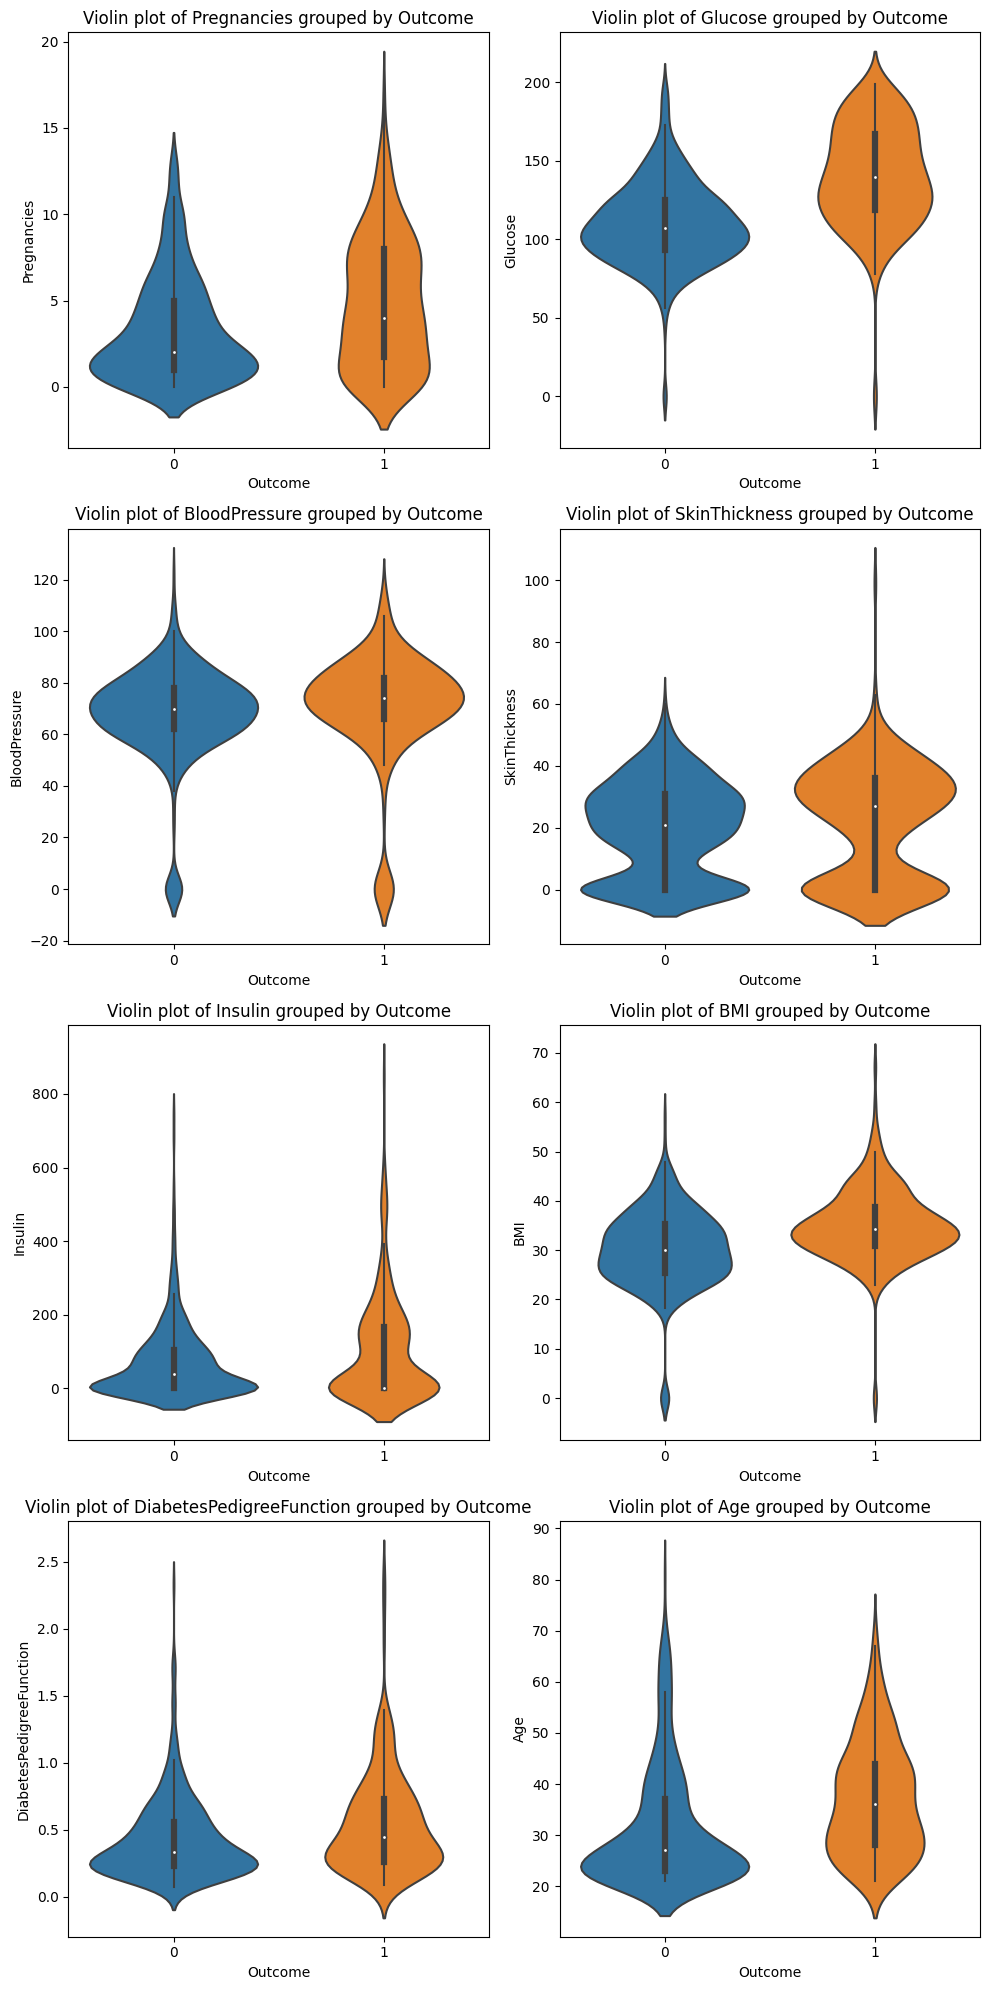

In [10]:
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=data, x='Outcome', y=column)
    plt.title(f'Violin plot of {column} grouped by Outcome')

plt.tight_layout()
plt.show()

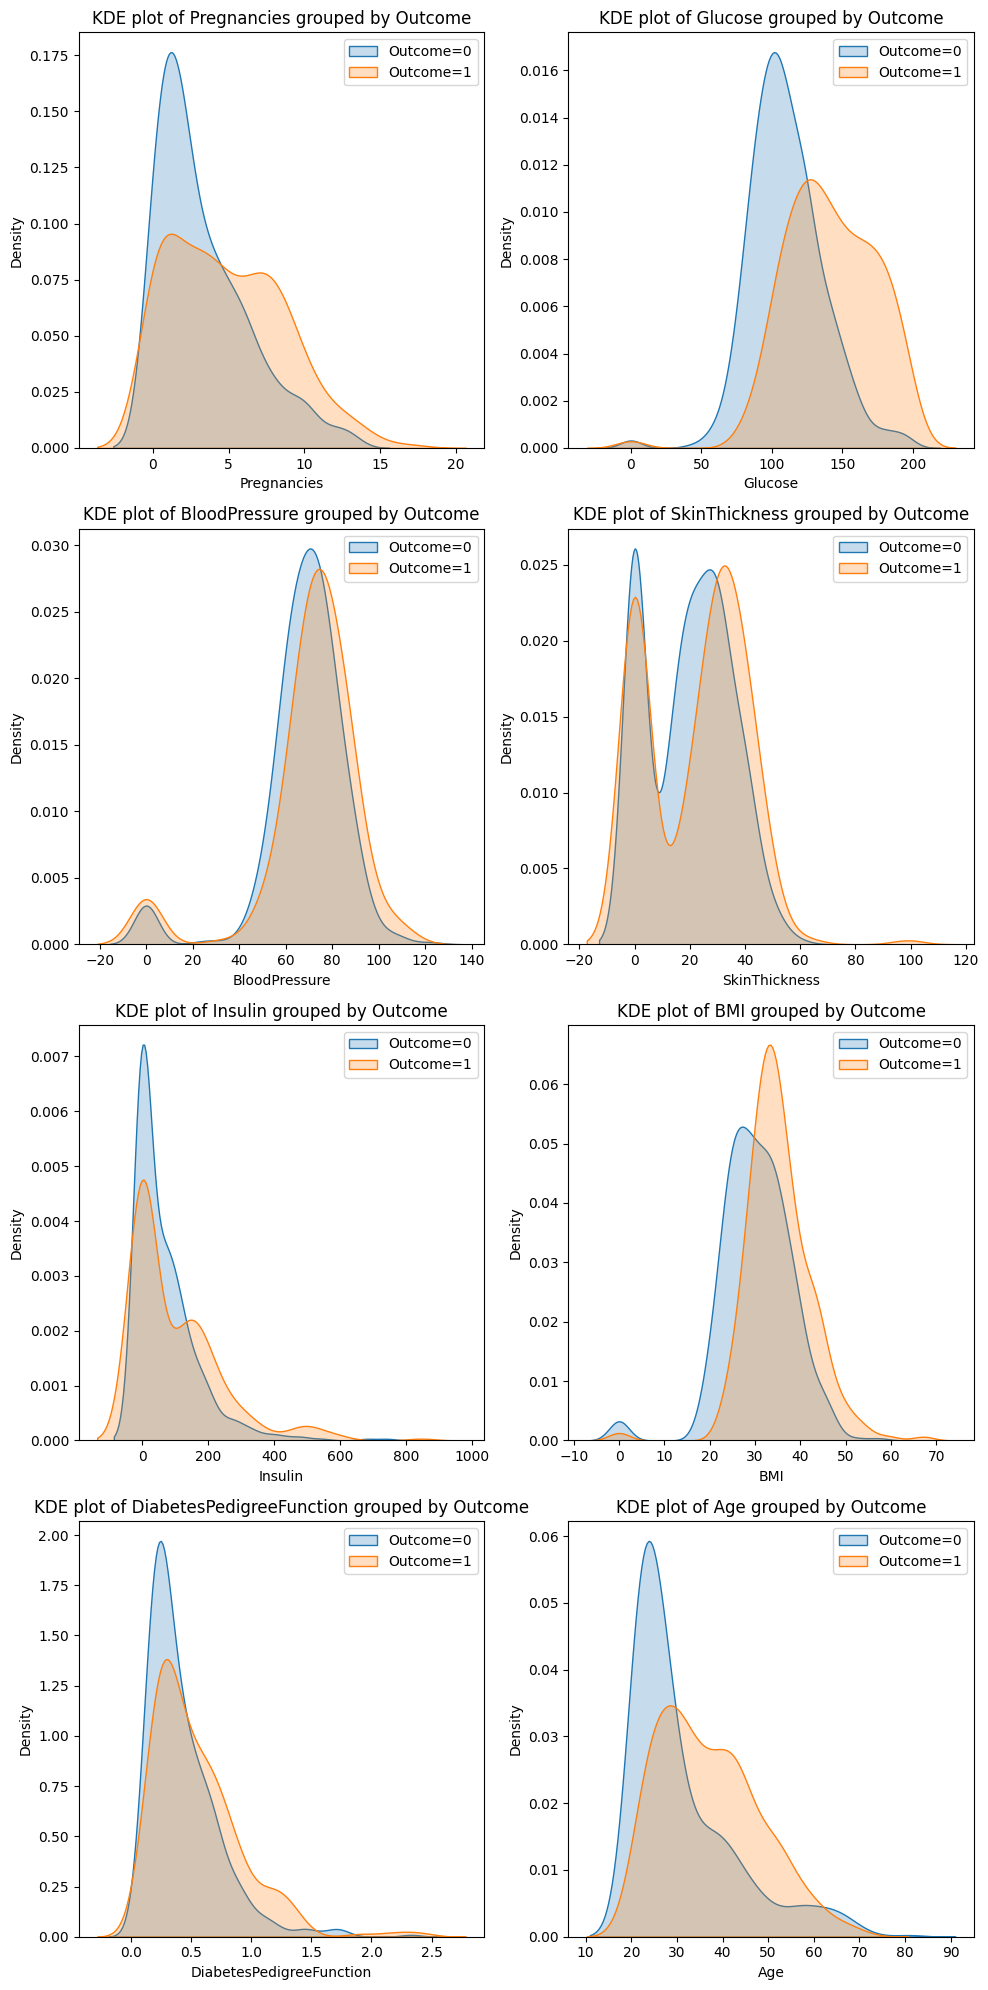

In [11]:
num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=data[data['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=data[data['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

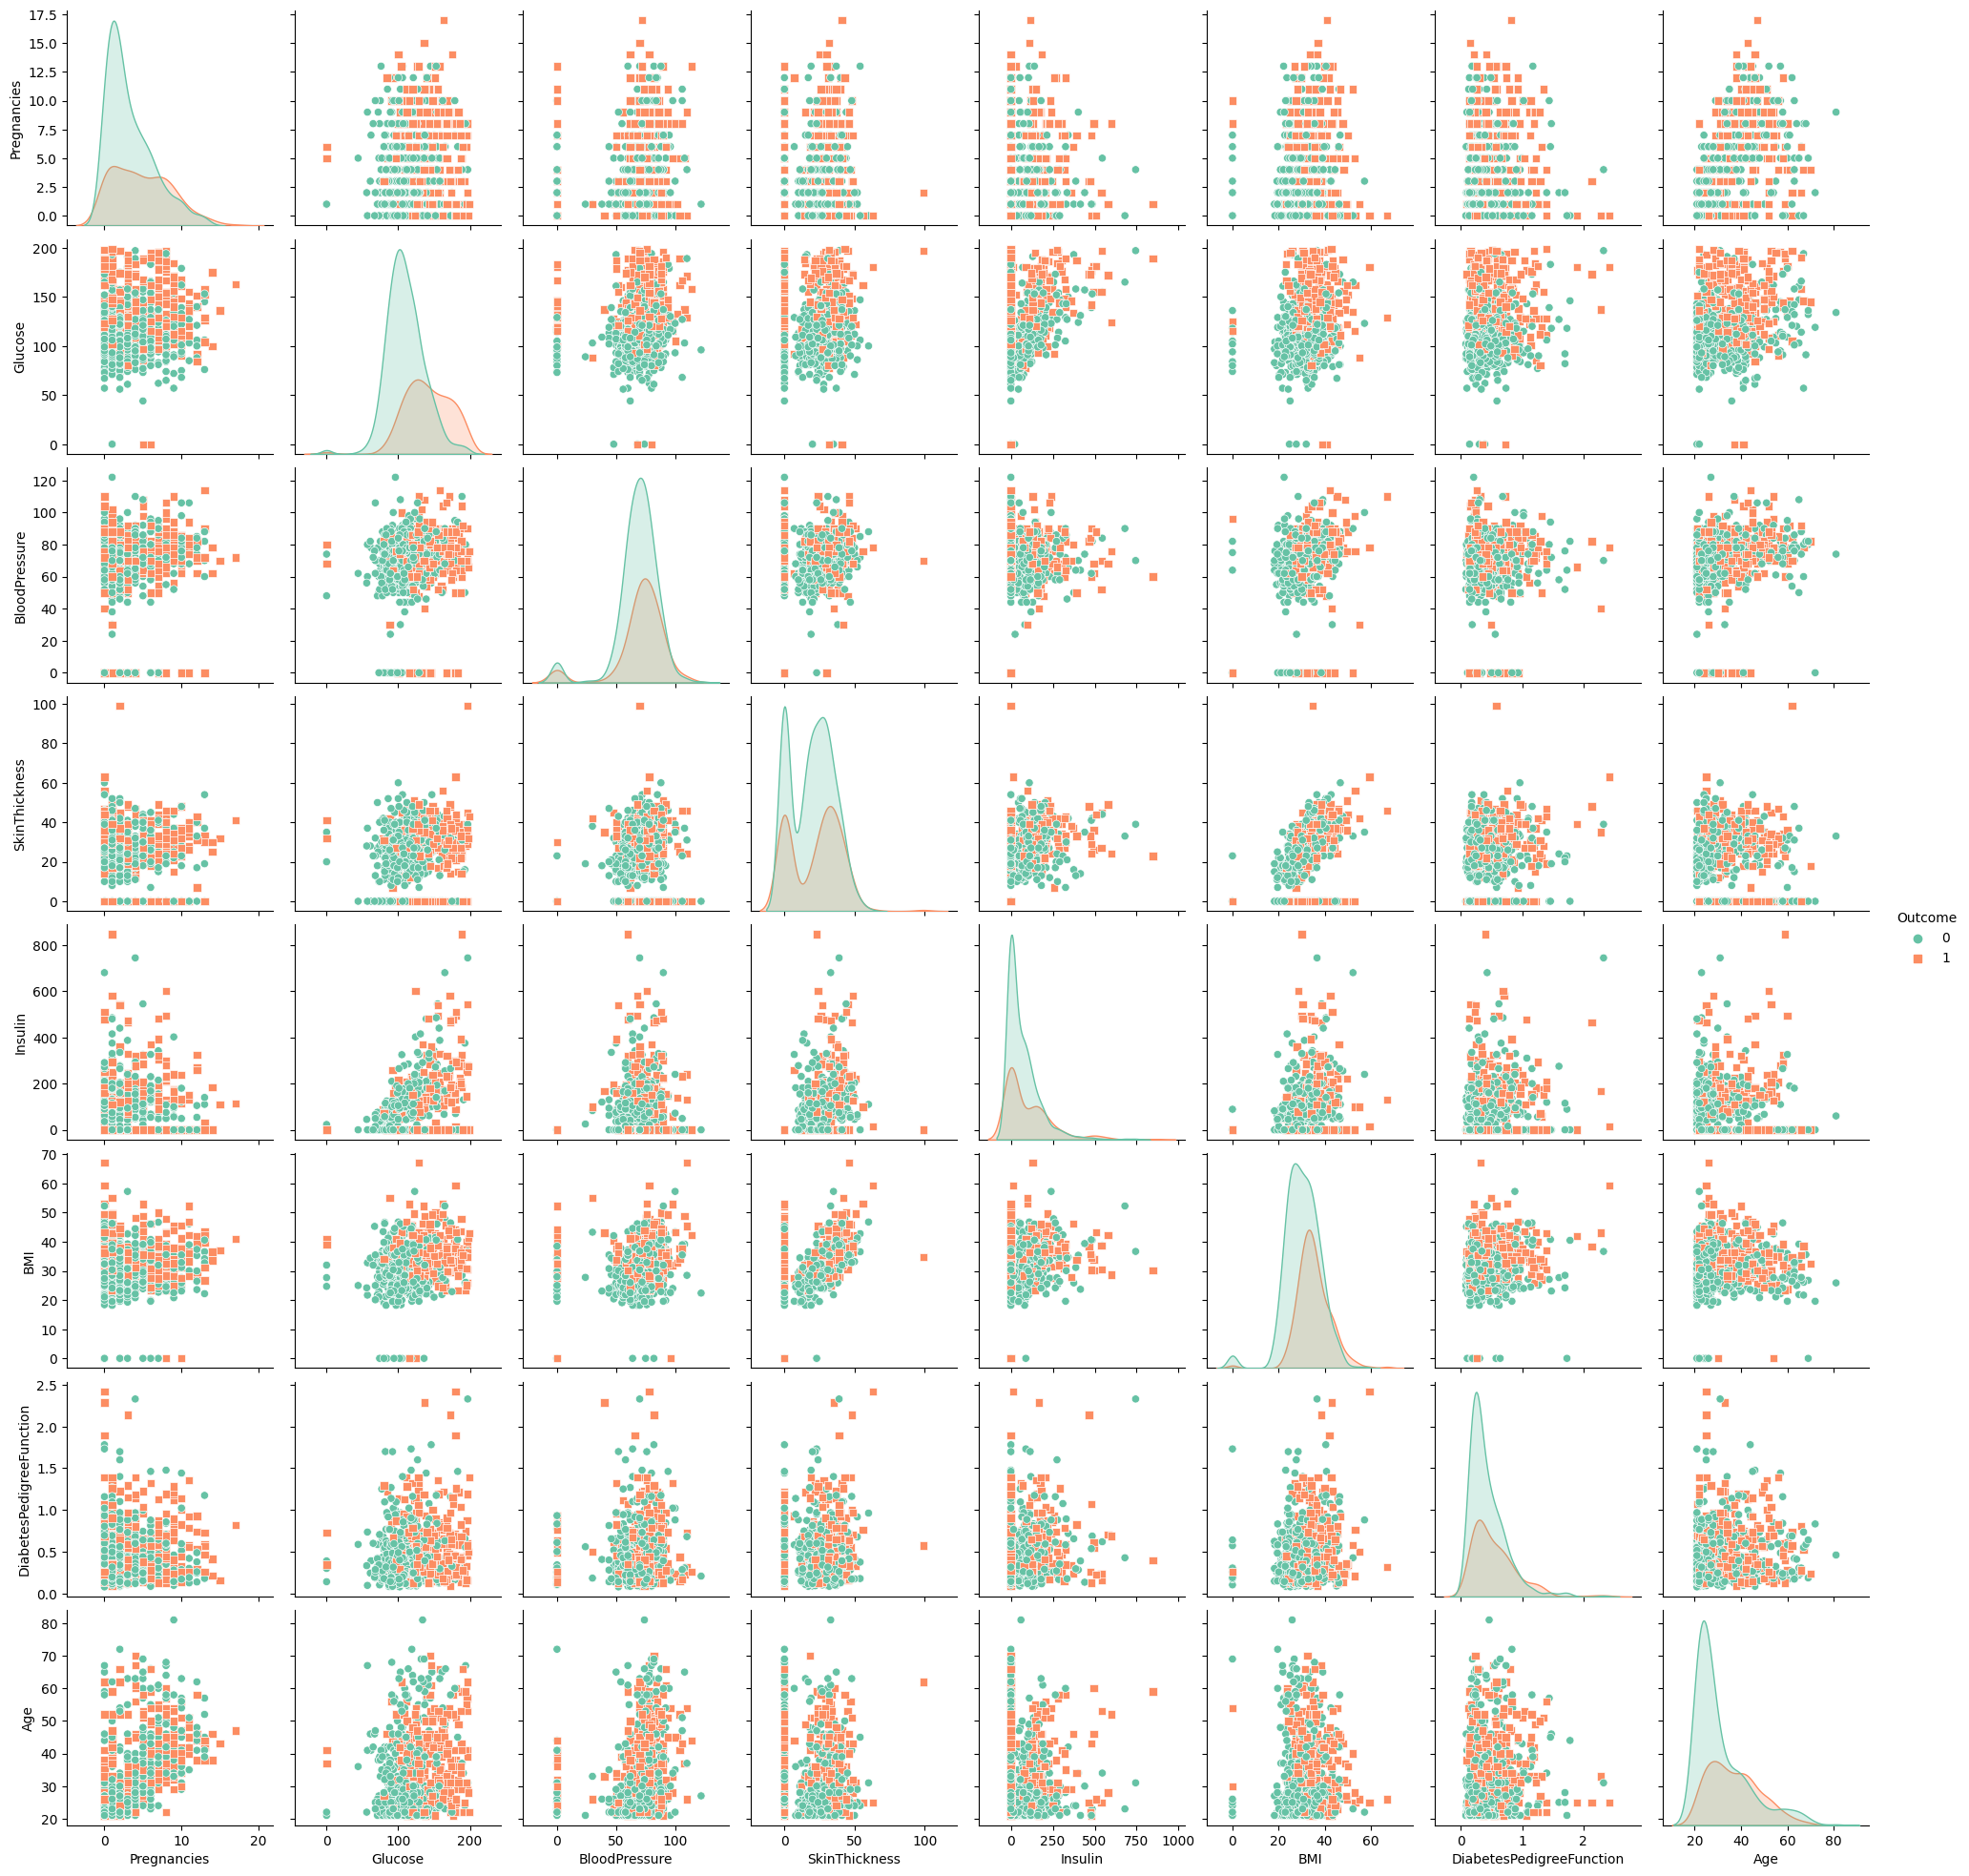

In [12]:
sns.pairplot(data, hue='Outcome', markers=["o", "s"], palette="Set2")
plt.show()

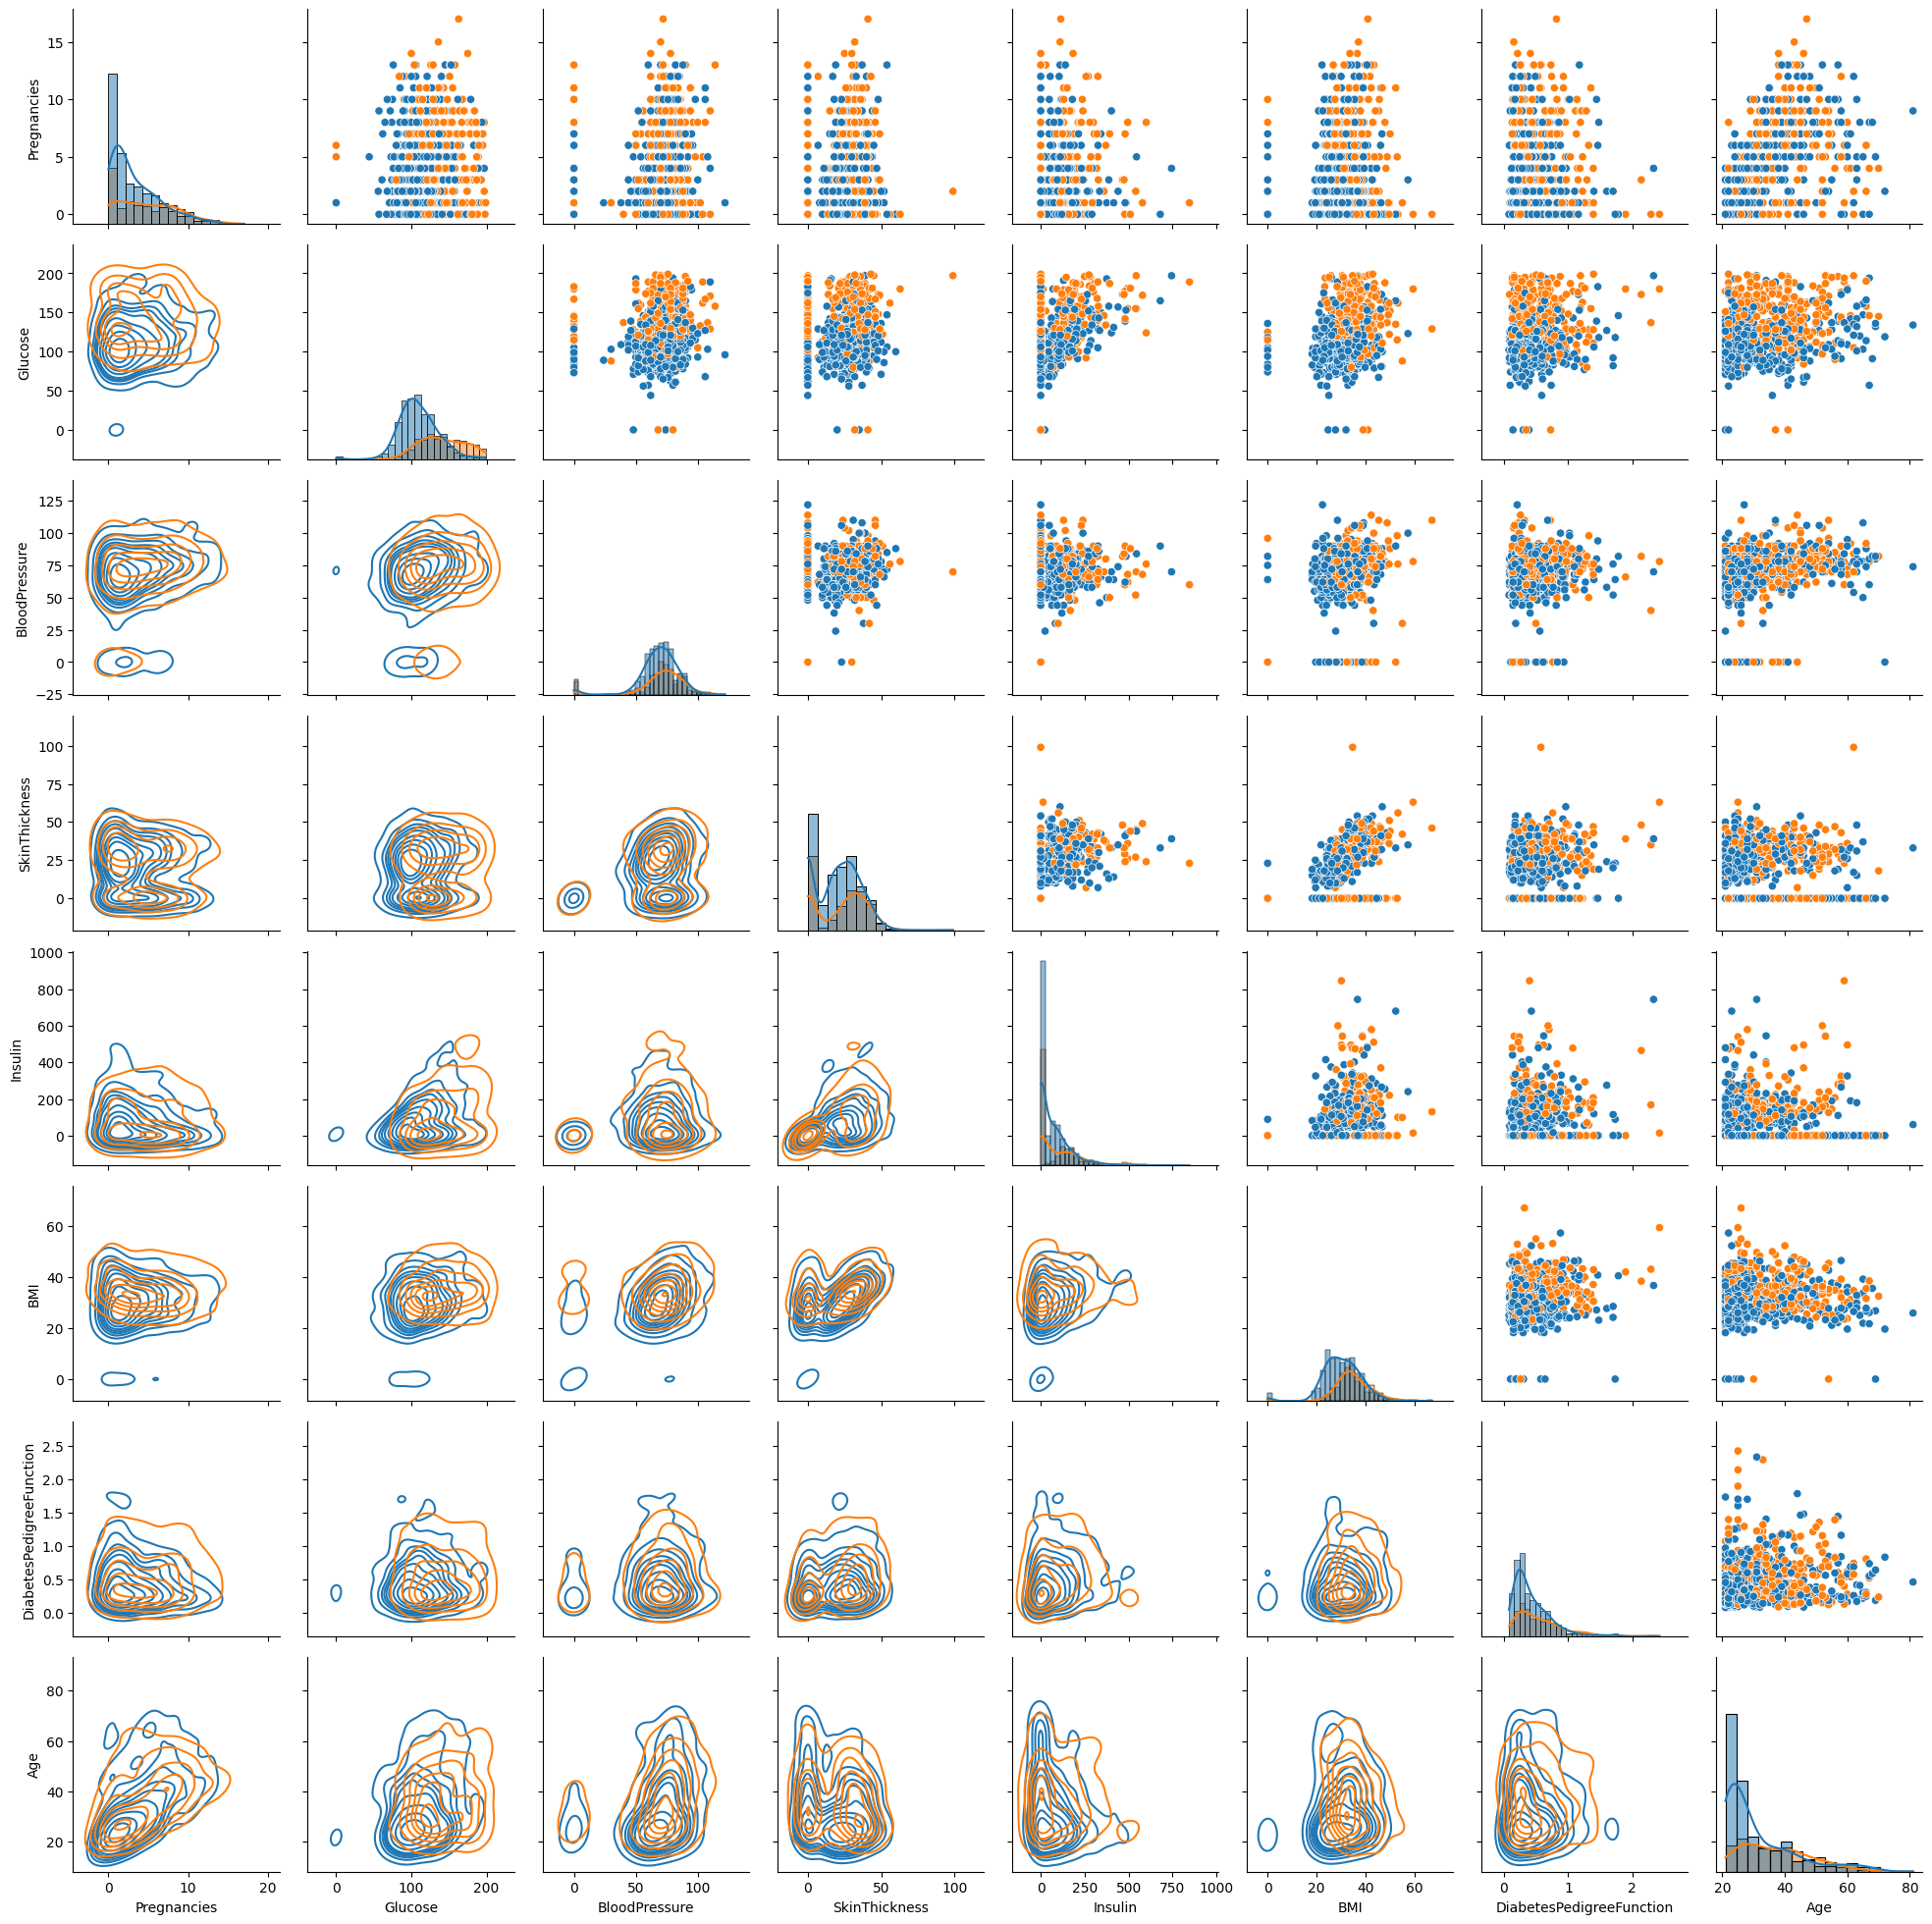

In [13]:
g = sns.PairGrid(data, hue='Outcome')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
plt.show()

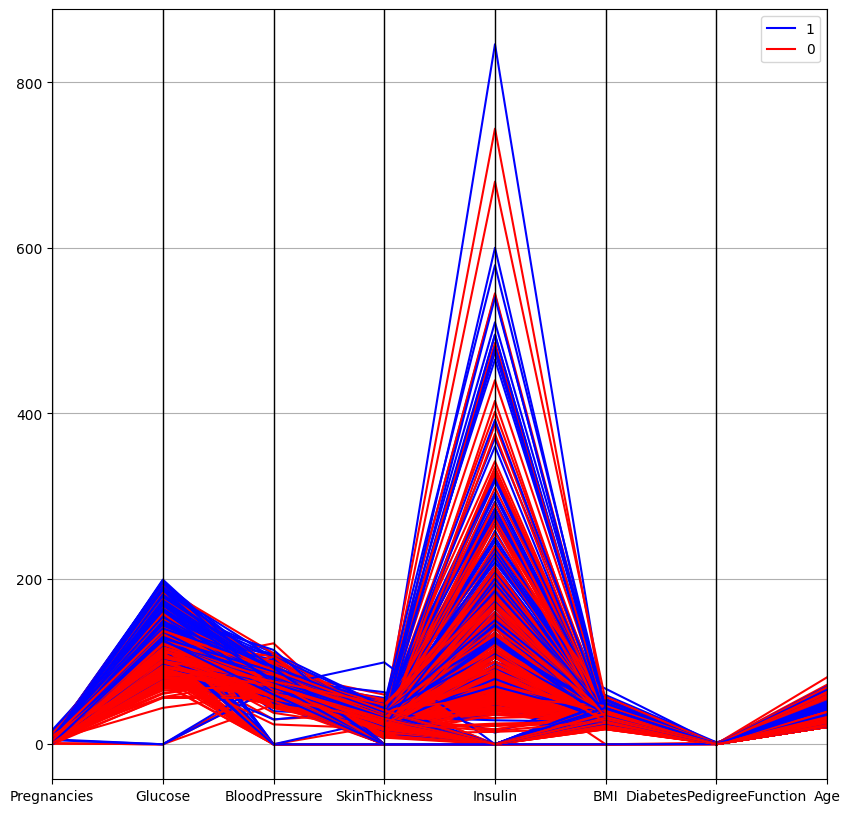

In [14]:
plt.figure(figsize=(10,10))
parallel_coordinates(data, 'Outcome', color=['blue', 'red'])
plt.show()

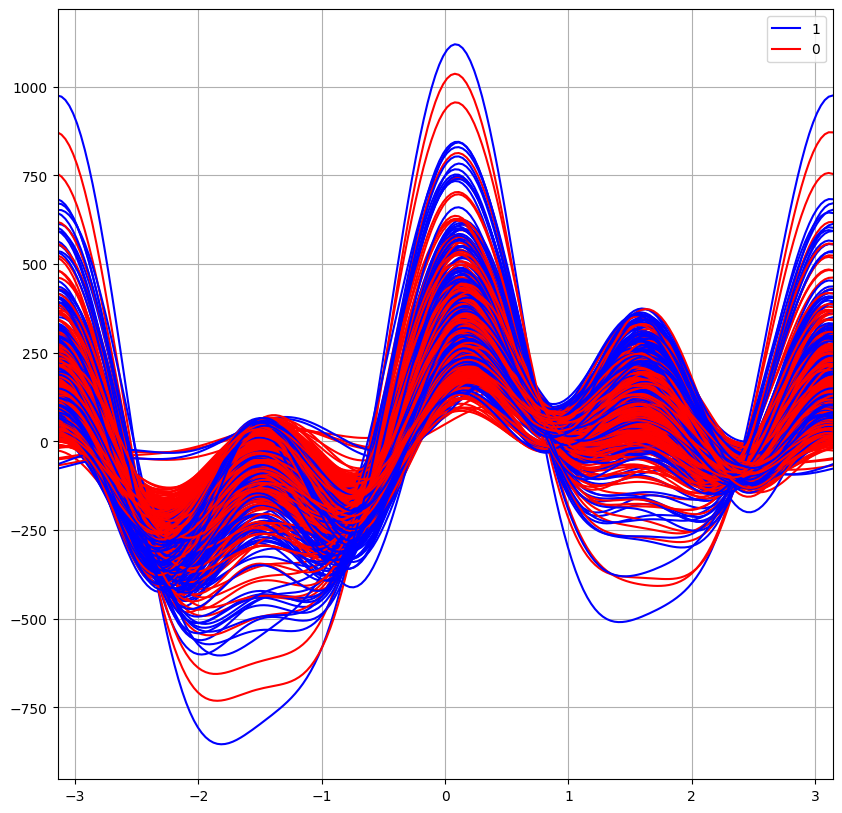

In [15]:
plt.figure(figsize=(10,10))
andrews_curves(data, 'Outcome', color=['blue', 'red'])
plt.show()

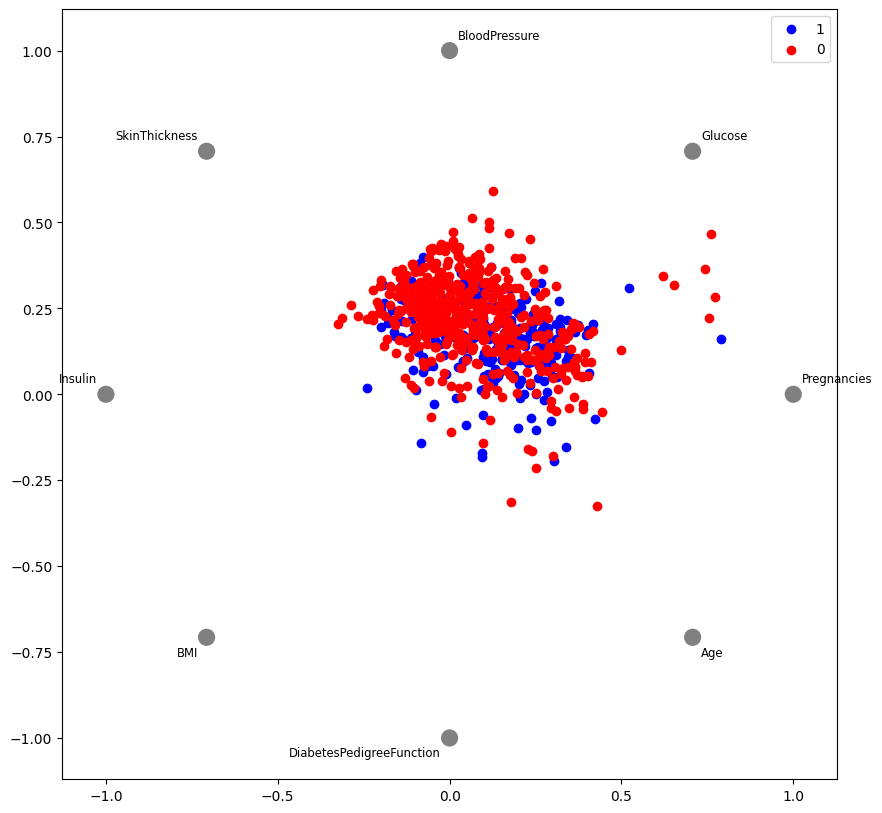

In [16]:
plt.figure(figsize=(10,10))
radviz(data, 'Outcome', color=['blue', 'red'])
plt.show()

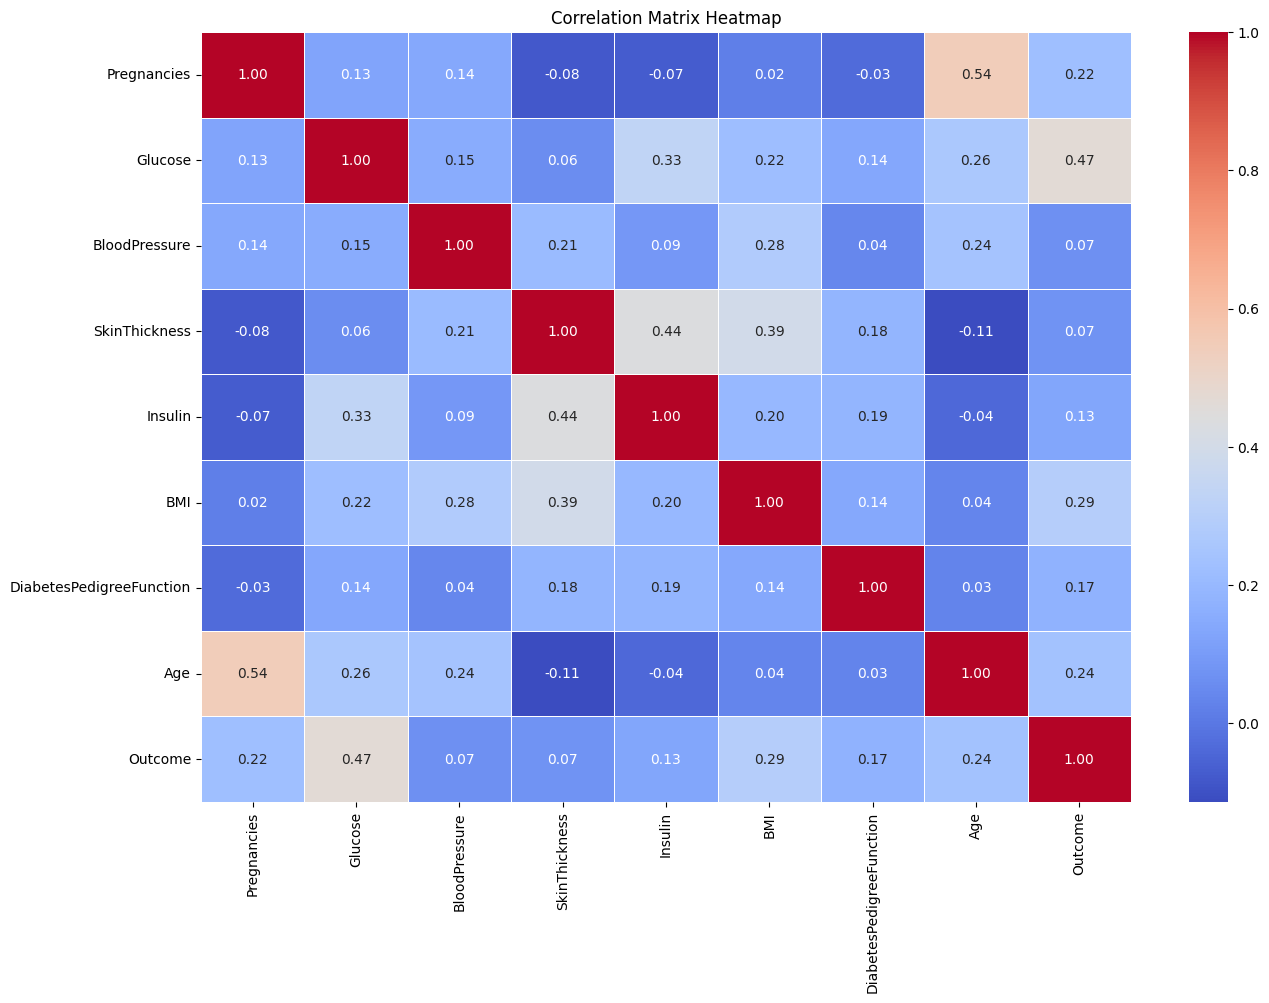

In [17]:
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

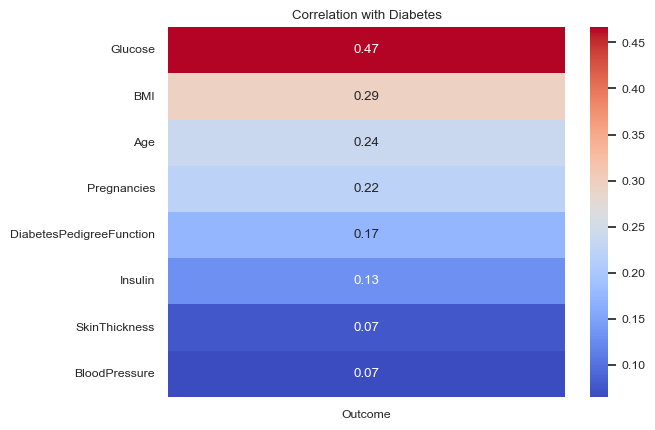

In [18]:
corr = data.corr()
target_corr = corr['Outcome'].drop('Outcome')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))

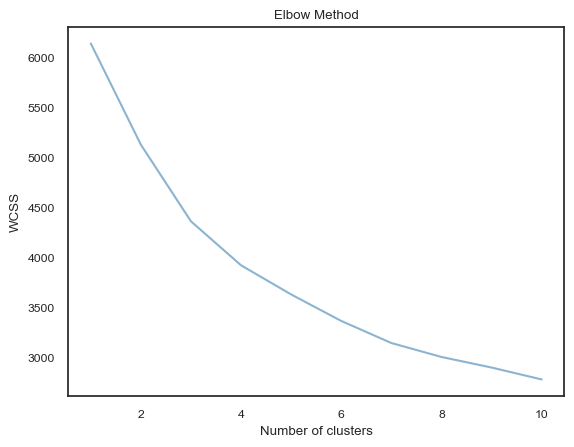

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

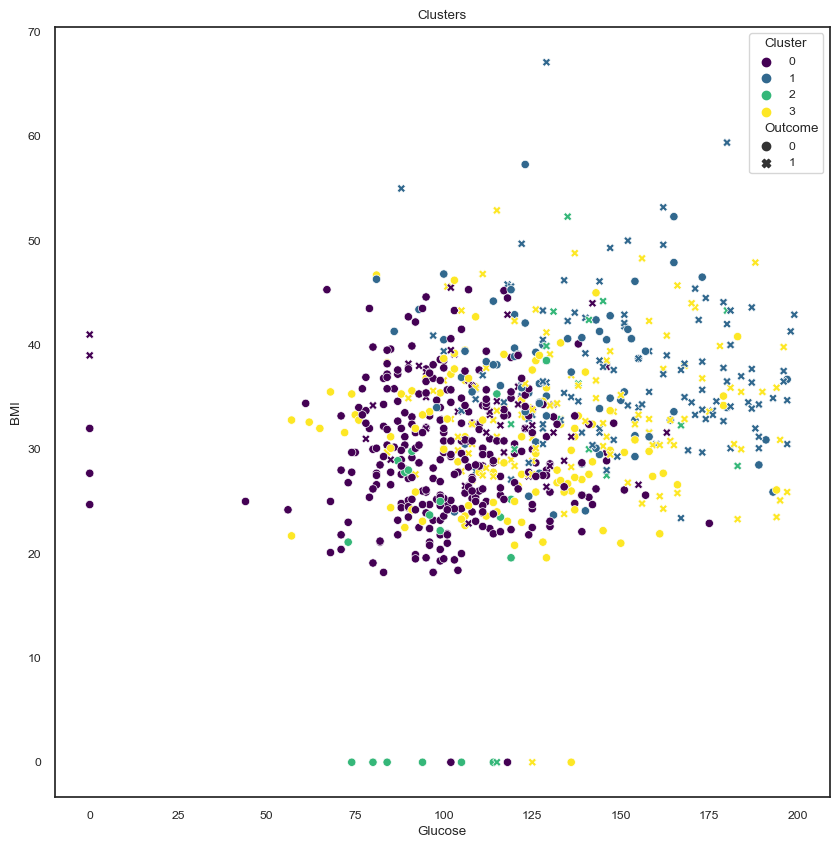

In [21]:
# Fit K-means clustering (**replace 'n_clusters' with the desired number of clusters**)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters using 'Glucose' and 'BMI'
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Cluster', style='Outcome', palette='viridis')
plt.title('Clusters')
plt.show()

In [22]:
#predictive analysis

In [23]:
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
import shap
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [24]:
df = pd.read_csv("diabetes.csv")

In [25]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

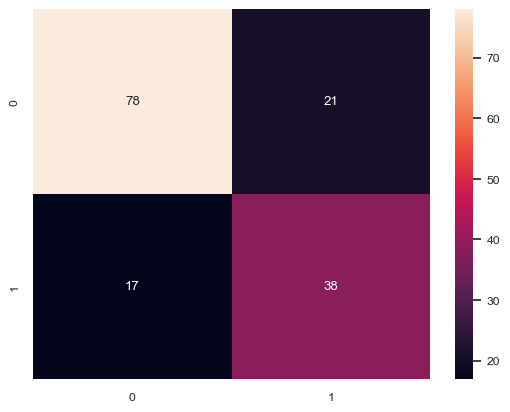

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [27]:
y_pred = model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred))

In [28]:
cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.71428571 0.76623377 0.74025974 0.7012987  0.74025974 0.80519481
 0.83116883 0.83116883 0.71052632 0.78947368]


In [29]:
average_cv_score = np.mean(cv_scores)
print("Average cross-validation score: ", average_cv_score)

Average cross-validation score:  0.762987012987013


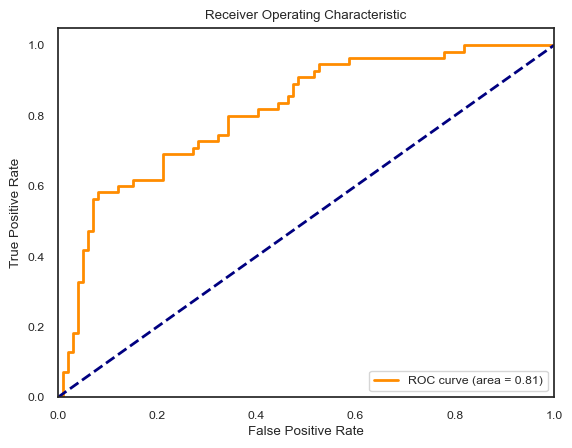

In [30]:
y_score = model.predict_proba(X_test)[:,1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

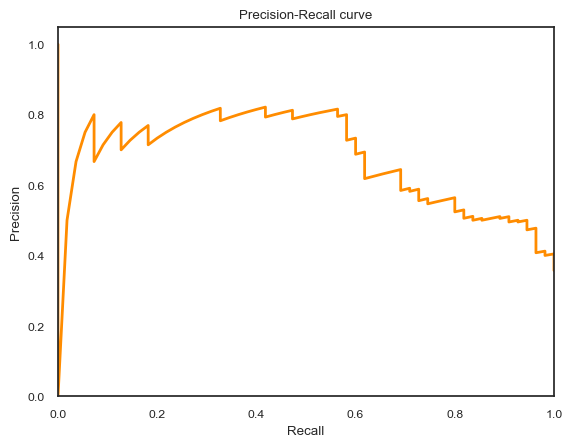

In [31]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

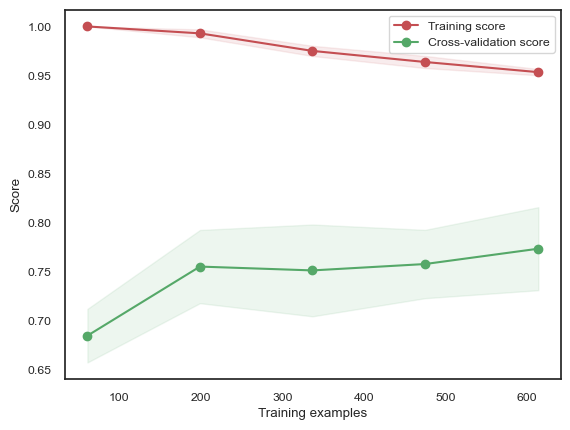

In [32]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [33]:
errors = y_test != y_pred
X_errors = X_test[errors]
y_errors = y_test[errors]
y_pred_errors = y_pred[errors]

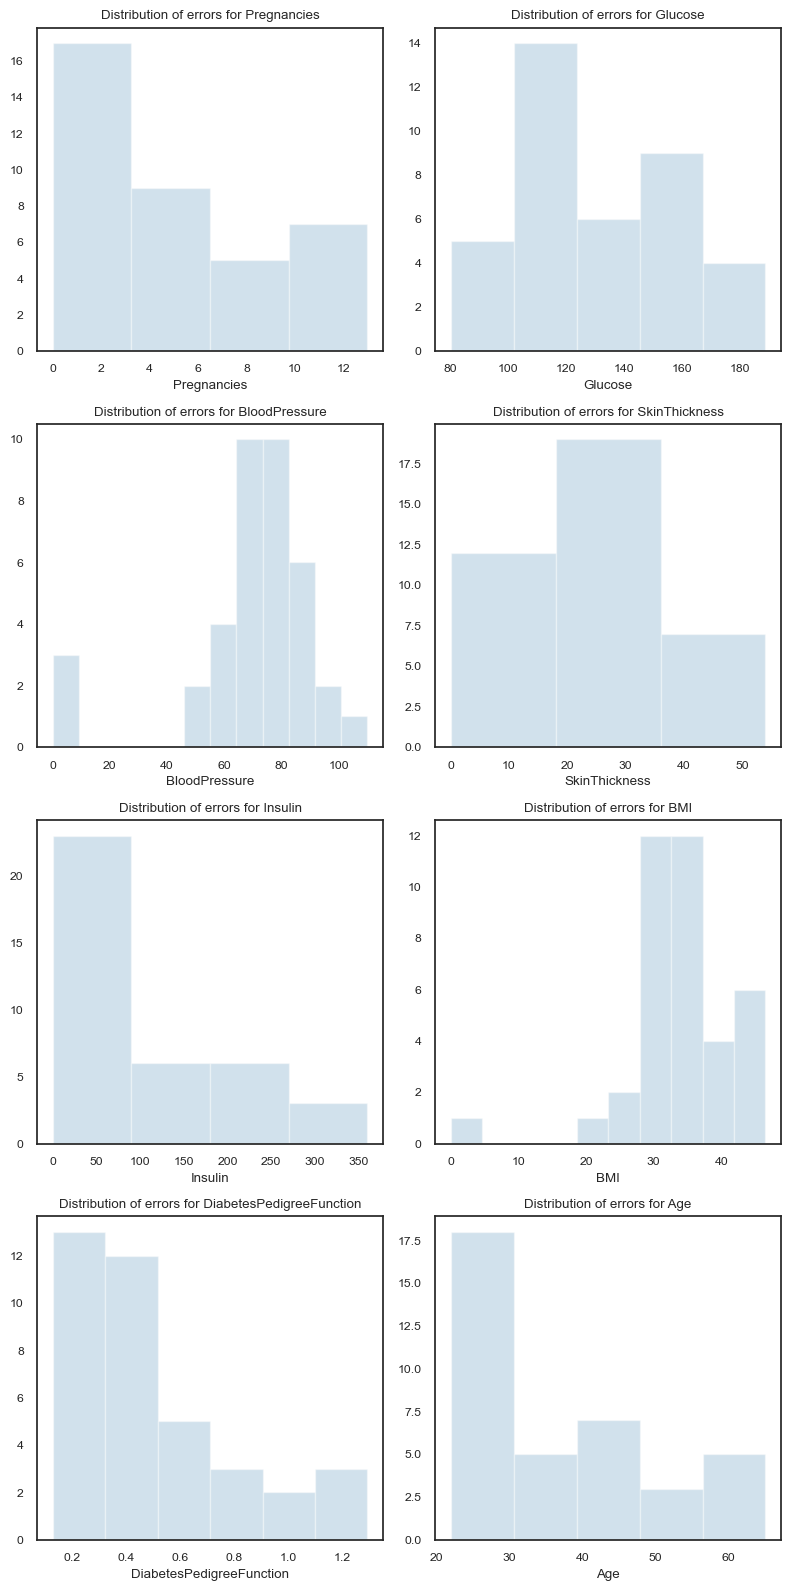

In [34]:
# Distribution plots of errors for each column
num_columns = len(X_errors.columns)
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(8, 4*num_rows))
for i, column in enumerate(X_errors.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.distplot(X_errors[column], kde=False)
    plt.title('Distribution of errors for {}'.format(column))

plt.tight_layout()
plt.show()

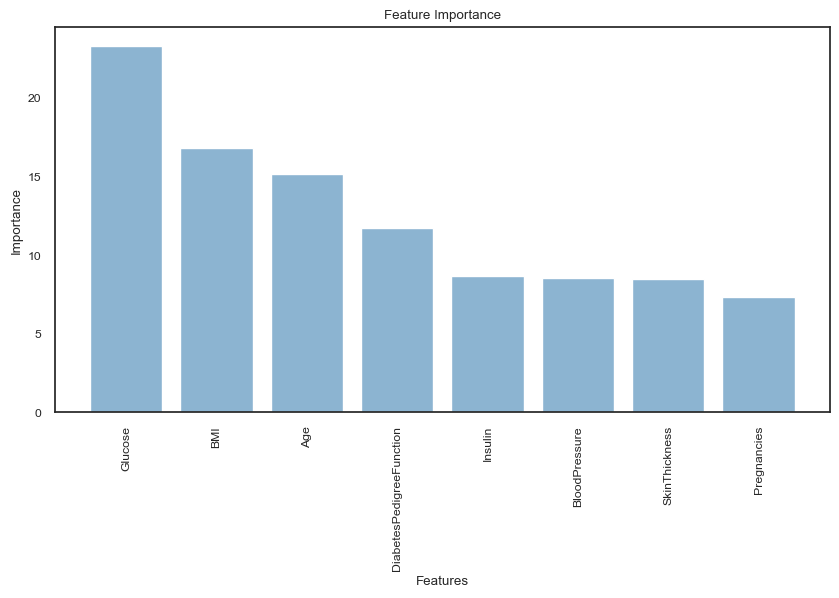

In [35]:
feature_importances = model.get_feature_importance(Pool(X, label=y))
feature_names = X.columns
importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Plotting feature importances
plt.figure(figsize=(10, 5))
plt.bar(*zip(*importances))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

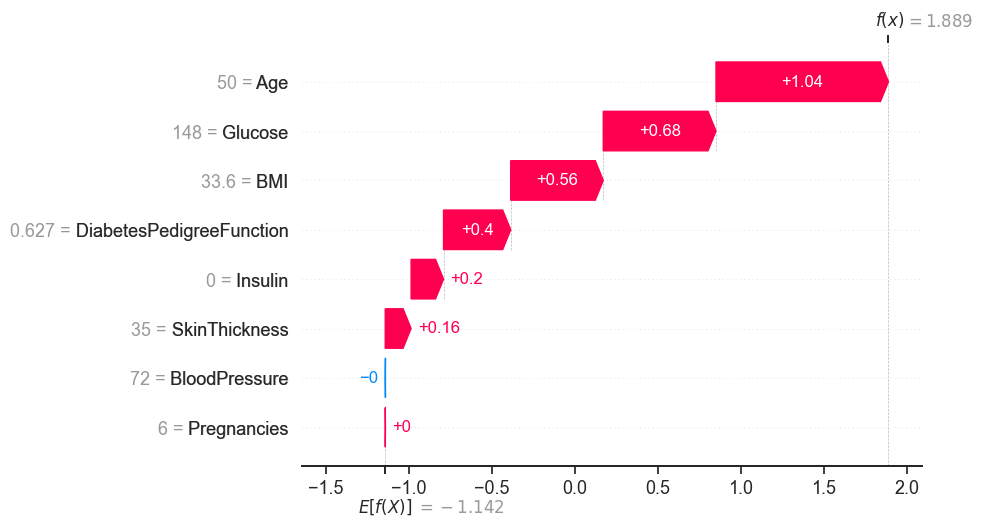

In [36]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])

In [37]:
param_grid = {'iterations': [100, 150, 200],
              'depth': [2, 4, 6, 8],
              'learning_rate': [0.01, 0.05, 0.1]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best parameters found: ",grid.best_params_)

Best parameters found:  {'depth': 2, 'iterations': 150, 'learning_rate': 0.1}


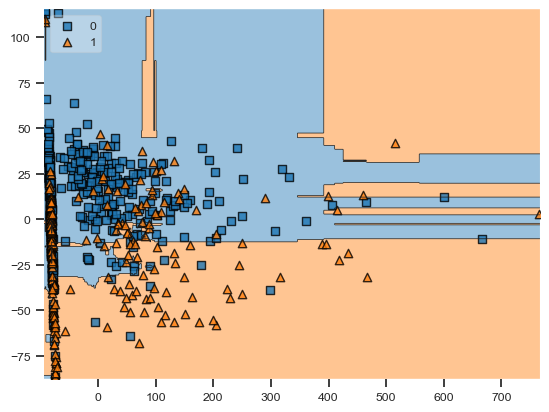

In [38]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

model.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.to_numpy(), clf=model, legend=2)
plt.show()

In [3]:
import pandas as pd
from pandas import DataFrame

df = pd.read_csv('diabetes.csv', index_col = 'Outcome', parse_dates=True)
# df['H-L'] = df.High - df.Low


print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_16316\266983430.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('diabetes.csv', index_col = 'Outcome', parse_dates=True)


In [4]:
print(df.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805    

In [5]:
print(df.cov())

                          Pregnancies      Glucose  BloodPressure  \
Pregnancies                 11.354056    13.947131       9.214538   
Glucose                     13.947131  1022.248314      94.430956   
BloodPressure                9.214538    94.430956     374.647271   
SkinThickness               -4.390041    29.239183      64.029396   
Insulin                    -28.555231  1220.935799     198.378412   
BMI                          0.469774    55.726987      43.004695   
DiabetesPedigreeFunction    -0.037426     1.454875       0.264638   
Age                         21.570620    99.082805      54.523453   

                          SkinThickness       Insulin         BMI  \
Pregnancies                   -4.390041    -28.555231    0.469774   
Glucose                       29.239183   1220.935799   55.726987   
BloodPressure                 64.029396    198.378412   43.004695   
SkinThickness                254.473245    802.979941   49.373869   
Insulin                      802.